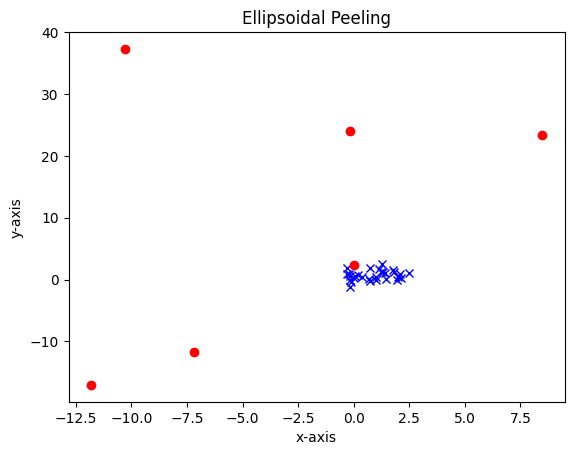

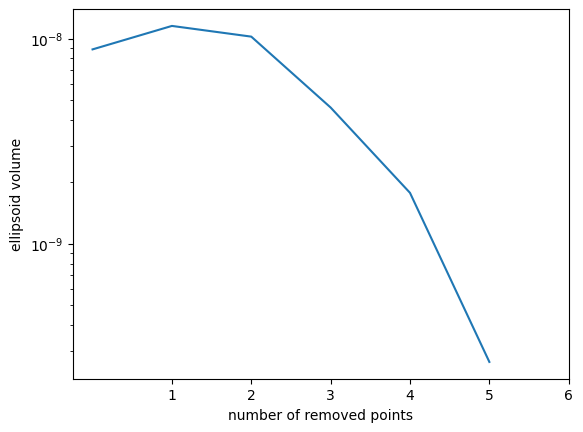

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp



# Initialize variables
volumes = []
removed = []
fig1, ax1 = plt.subplots()
ax1.set_title('Ellipsoidal Peeling')
ax1.set_xlabel('x-axis')
ax1.set_ylabel('y-axis')

for i in range(6):
    # fit ellipsoid
    A = cp.Variable((2, 2), symmetric=True)
    b = cp.Variable((2, 1))
    v = cp.Variable((X.shape[1], 1))
    objective = cp.Maximize(cp.log_det(A))
    constraints = [cp.norm(A @ X[:, j].reshape((2,1)) + b) <= 1 + v[j] for j in range(X.shape[1])]
    prob = cp.Problem(objective, constraints)
    prob.solve()

    # plot ellipsoid
    #ellip_draw(A.value, b.value,X)

    # detect outliers
    v = v.value
    idx = np.argmax(v)
    removed.append(X[:, idx])
    X = np.delete(X, idx, axis=1)
    volumes.append(1 / np.linalg.det(A.value))

# plot points and outliers
ax1.plot(X[0, :], X[1, :], 'bx')
ax1.plot(np.array(removed)[:, 0], np.array(removed)[:, 1], 'ro')

# plot ellipsoid volumes
fig2, ax2 = plt.subplots()
ax2.semilogy(volumes)
ax2.set_xlabel('number of removed points')
ax2.set_ylabel('ellipsoid volume')
ax2.set_xticks(range(1, len(volumes) + 1))
plt.show()


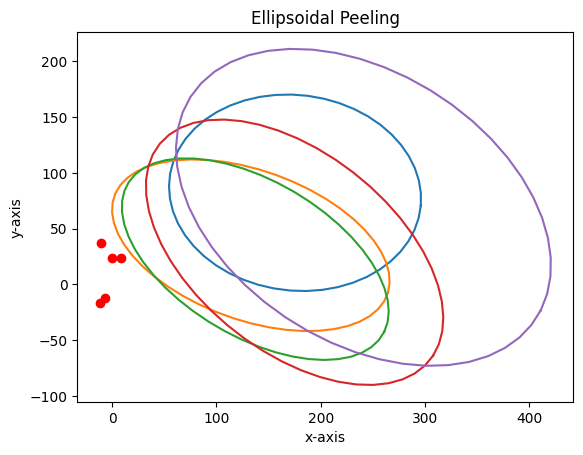

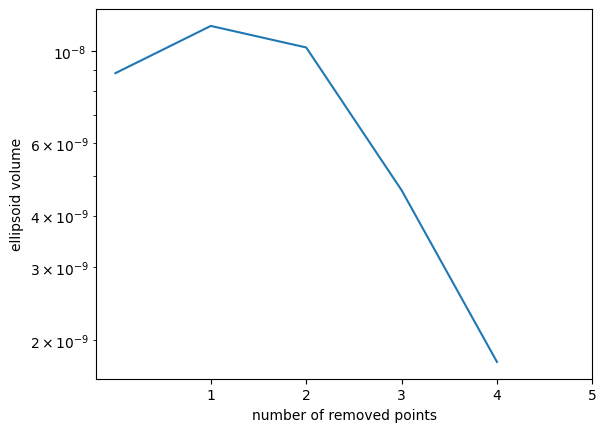

In [4]:
volumes = []
removed = []
fig1, ax1 = plt.subplots()
ax1.set_title('Ellipsoidal Peeling')
ax1.set_xlabel('x-axis')
ax1.set_ylabel('y-axis')

for i in range(5):
    # fit ellipsoid
    A = cp.Variable((2, 2), symmetric=True)
    b = cp.Variable((2, 1))
    v = cp.Variable((X.shape[1], 1))
    objective = cp.Maximize(cp.log_det(A))
    constraints = [cp.norm(A @ X[:, j].reshape((2,1)) + b) <= 1 + v[j] for j in range(X.shape[1])]
    prob = cp.Problem(objective, constraints)
    prob.solve()

    # plot ellipsoid
    ellipse_draaw(A.value, b.value)

    # detect outliers
    v = v.value
    idx = np.argmax(v)
    removed.append(X[:, idx])
    X = np.delete(X, idx, axis=1)
    volumes.append(1 / np.linalg.det(A.value))

# plot points and outliers
ax1.plot(np.array(removed)[:, 0], np.array(removed)[:, 1], 'ro')

# plot ellipsoid volumes
fig2, ax2 = plt.subplots()
ax2.semilogy(volumes)
ax2.set_xlabel('number of removed points')
ax2.set_ylabel('ellipsoid volume')
ax2.set_xticks(range(1, len(volumes) + 1))
plt.show()

In [147]:
def ellipse_draw(A,b):
   t = np.linspace(0,2*np.pi,100)
   x = np.sin(t)
   y = np.cos(t)
   Y = np.vstack((x,y))
   s,V = np.linalg.eigh(A.T@A)
   X = V@np.diag(s**(-.5))@Y
   X = X-(np.linalg.inv(A)@b)[:,None]
   
   plt.plot(X[0,:],X[1,:],color='g',alpha=.5)

In [3]:
def ellipse_draaw(A, b):
    theta_grid = np.linspace(0, 2*np.pi)
    phi = np.arctan2(A[1,0], A[0,0])
    eigvals, eigvecs = np.linalg.eig(A)
    a, b = np.sqrt(eigvals)
    x0, y0 = b * np.cos(phi), a * np.sin(phi)
    theta = np.arctan2(eigvecs[1,0], eigvecs[0,0])
    x, y = np.sqrt(eigvals).reshape((2,1)) * np.array([np.cos(theta_grid), np.sin(theta_grid)])
    X = x * np.cos(theta) - y * np.sin(theta) + x0 + b
    Y = x * np.sin(theta) + y * np.cos(theta) + y0 + b
    plt.plot(X, Y)

In [6]:
import numpy as np

# data for ellipsoidal peeling problem
X = np.array([
    [-10.29, 37.289],
    [1.9409, 0.0079],
    [1.2120, 1.2379],
    [-0.0078, 0.2580],
    [2.0823, 0.8685],
    [1.3899, 1.0880],
    [0.3645, 0.4404],
    [1.4437, 0.0501],
    [1.7812, 1.5690],
    [0.1783, 0.7344],
    [-0.1878, -1.2023],
    [1.9863, 0.4814],
    [1.3274, 1.2341],
    [1.0215, -0.0039],
    [0.0529, 0.6256],
    [-0.1859, -0.0559],
    [2.4725, 1.0557],
    [-0.2173, 0.9588],
    [-0.1283, -0.3493],
    [0.7389, 1.9535],
    [1.1286, 1.6565],
    [-0.1678, 0.5394],
    [0.7376, -0.2132],
    [-0.3194, 1.9312],
    [1.0112, 0.3549],
    [1.8057, 1.2316],
    [0.0102, 2.3396],
    [1.2895, 2.4789],
    [2.1380, 0.3159],
    [-0.2919, 0.9271],
    [0.6694, 0.1564],
    [8.4665, 23.3274],
    [-7.1971, -11.7014],
    [-11.8130, -17.0197],
    [-0.1900, 24.0273]
]).T
